<a href="https://colab.research.google.com/github/HuYazeed/.github.io/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
!pip install h3
import folium
import requests
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from h3 import h3

shot_table = pd.read_csv("Shot_Spotter_Gun_Shots.csv")

shot_table

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,X,Y,OBJECTID,ID,TYPE,SOURCE,LATITUDE,LONGITUDE,DATETIME,AUTOACKNOWLEDGED,INDC,GIS_ID,GLOBALID,CREATOR,CREATED,EDITOR,EDITED
0,-77.002,38.916,40001,5D39821,Single_Gunshot,WashingtonDC5D,38.916,-77.002,2014/01/01 06:18:00+00,NaN,NaN,ShotSpotter_40001,{A5E91420-1F32-4855-9D4E-9812531F96B9},JLAY,2021/03/10 21:45:53+00,DCGIS,2021/03/11 03:09:22+00
1,-77.000,38.823,40002,7D119445,Multiple_Gunshots,WashingtonDC7D,38.823,-77.000,2014/01/01 05:00:10+00,NaN,NaN,ShotSpotter_40002,{4E43448E-FBA5-49FF-B58B-86B2E3825FC6},JLAY,2021/03/10 21:45:53+00,DCGIS,2021/03/11 03:09:53+00
2,-76.993,38.893,40003,1D55993,Multiple_Gunshots,WashingtonDC1D,38.893,-76.993,2014/01/01 05:00:10+00,NaN,NaN,ShotSpotter_40003,{7306123A-8090-41B9-8A05-CAAFEB5C7089},JLAY,2021/03/10 21:45:53+00,DCGIS,2021/03/11 03:09:34+00
3,-77.026,38.940,40004,4D34326,Multiple_Gunshots,WashingtonDC4D,38.940,-77.026,2014/01/01 05:00:11+00,NaN,NaN,ShotSpotter_40004,{CB4CCF70-1552-4A16-BC48-6004EE59F487},JLAY,2021/03/10 21:45:53+00,DCGIS,2021/03/11 03:10:07+00
4,-76.938,38.890,40005,6D102264,Multiple_Gunshots,WashingtonDC6D,38.890,-76.938,2014/01/01 05:00:12+00,NaN,NaN,ShotSpotter_40005,{EBF9195C-0052-485D-9A4B-ED47A6DCC2F7},JLAY,2021/03/10 21:45:53+00,DCGIS,2021/03/11 03:09:20+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65857,-76.949,38.869,106162,6D52-493490,Single Gunshot,WashingtonDC6D,38.869,-76.949,2022/07/01 01:19:34+00,NaN,True,ShotSpotter_GunshotPt_3762,{C93DDE6E-965D-48CD-A9C1-E4FA152B9838},JLAY,2022/11/02 17:56:37+00,JLAY,2022/11/02 17:56:37+00
65858,-77.003,38.832,106163,7D53-617488,Multiple Gunshots,WashingtonDC7D,38.832,-77.003,2022/07/01 02:52:51+00,NaN,True,ShotSpotter_GunshotPt_3763,{EF189685-9D8B-4BF5-B903-BDCF5B5BB4A0},JLAY,2022/11/02 17:56:37+00,JLAY,2022/11/02 17:56:37+00
65859,-76.966,38.875,106164,6D52-493738,Multiple Gunshots,WashingtonDC6D,38.875,-76.966,2022/07/01 03:03:47+00,NaN,True,ShotSpotter_GunshotPt_3764,{7430C065-8328-41BB-A521-275F382FFEA9},JLAY,2022/11/02 17:56:37+00,JLAY,2022/11/02 17:56:37+00
65860,-76.966,38.875,106165,6D52-493739,Multiple Gunshots,WashingtonDC6D,38.875,-76.966,2022/07/01 03:03:55+00,NaN,True,ShotSpotter_GunshotPt_3765,{CDBFA6D3-9844-4132-88A6-ED5034247B24},JLAY,2022/11/02 17:56:37+00,JLAY,2022/11/02 17:56:37+00


In [73]:
shot_table['datetime'] = pd.to_datetime(shot_table['DATETIME'],
                                        format='%Y/%m/%d %H:%M:%S.%f', utc=True)

shot_table['year'] = shot_table['datetime'].dt.year
shot_table['month'] = shot_table['datetime'].dt.month
shot_table['day'] = shot_table['datetime'].dt.day
shot_table['hour'] = shot_table['datetime'].dt.hour

shot_table['time'] = (shot_table['datetime'].dt.year *1000000 + 
                      shot_table['datetime'].dt.month *10000 +
                      shot_table['datetime'].dt.day*100 +
                        shot_table['datetime'].dt.hour)

shot_table['Number_shots'] = 1

del shot_table['ID']
del shot_table['DATETIME']
del shot_table['AUTOACKNOWLEDGED']
del shot_table['GLOBALID']
del shot_table['CREATOR']
del shot_table['CREATED']
del shot_table['EDITOR']
del shot_table['EDITED']
del shot_table['GIS_ID']
del shot_table['INDC']

shot_table = shot_table.sort_values(by=['year', 'month', 'day', 'hour'])
shot_table = shot_table.reset_index()
del shot_table['index']
#add total shots to plots
total_shots = 1
shot_table['total_shots'] = 0
for i, ele in shot_table.iterrows():
  shot_table.at[i,'total_shots'] = total_shots
  total_shots = total_shots + 1

shot_table

,X,Y,OBJECTID,TYPE,SOURCE,LATITUDE,LONGITUDE,datetime,year,month,day,hour,time,Number_shots,total_shots
0,-77.000,38.823,40002,Multiple_Gunshots,WashingtonDC7D,38.823,-77.000,2014-01-01 05:00:10+00:00,2014,1,1,5,2014010105,1,1
1,-76.993,38.893,40003,Multiple_Gunshots,WashingtonDC1D,38.893,-76.993,2014-01-01 05:00:10+00:00,2014,1,1,5,2014010105,1,2
2,-77.026,38.940,40004,Multiple_Gunshots,WashingtonDC4D,38.940,-77.026,2014-01-01 05:00:11+00:00,2014,1,1,5,2014010105,1,3
3,-76.938,38.890,40005,Multiple_Gunshots,WashingtonDC6D,38.890,-76.938,2014-01-01 05:00:12+00:00,2014,1,1,5,2014010105,1,4
4,-76.989,38.848,40006,Multiple_Gunshots,WashingtonDC7D,38.848,-76.989,2014-01-01 05:00:13+00:00,2014,1,1,5,2014010105,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65857,-76.949,38.869,106162,Single Gunshot,WashingtonDC6D,38.869,-76.949,2022-07-01 01:19:34+00:00,2022,7,1,1,2022070101,1,65858
65858,-77.003,38.832,106163,Multiple Gunshots,WashingtonDC7D,38.832,-77.003,2022-07-01 02:52:51+00:00,2022,7,1,2,2022070102,1,65859
65859,-76.966,38.875,106164,Multiple Gunshots,WashingtonDC6D,38.875,-76.966,2022-07-01 03:03:47+00:00,2022,7,1,3,2022070103,1,65860
65860,-76.966,38.875,106165,Multiple Gunshots,WashingtonDC6D,38.875,-76.966,2022-07-01 03:03:55+00:00,2022,7,1,3,2022070103,1,65861


In [74]:


shot_table[pd.notnull(shot_table["LONGITUDE"])]["LONGITUDE"].count()

65862

In [75]:
df_map = shot_table.groupby(['LONGITUDE', 'LATITUDE']).sum().reset_index()
df_map

,LONGITUDE,LATITUDE,X,Y,OBJECTID,year,month,day,hour,time,Number_shots,total_shots
0,-77.056,38.883,-77.056002,38.883008,89384,2020,9,22,11,2020092211,1,49345
1,-77.051,38.953,-154.102005,77.906016,164975,4040,8,40,12,4040084012,2,84861
2,-77.051,38.954,-77.051002,38.954008,92118,2020,11,24,8,2020112408,1,52226
3,-77.051,38.962,-77.051002,38.962008,92475,2020,11,29,5,2020112905,1,52475
4,-77.050,38.954,-77.050002,38.954008,92120,2020,11,24,8,2020112408,1,52228
...,...,...,...,...,...,...,...,...,...,...,...,...
7913,-76.896,38.864,-76.896002,38.864008,86237,2020,7,16,6,2020071606,1,46753
7914,-76.895,38.897,-76.895002,38.897008,82662,2020,4,27,5,2020042705,1,42605
7915,-76.895,38.898,-76.895002,38.898008,82781,2020,5,22,1,2020052201,1,43210
7916,-76.890,38.896,-76.890002,38.896008,82696,2020,4,28,23,2020042823,1,42639


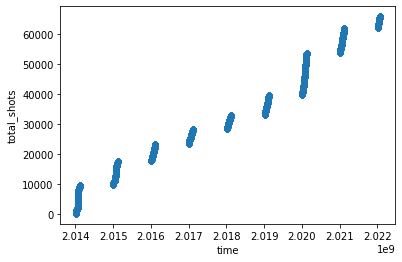

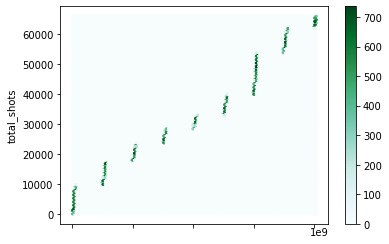

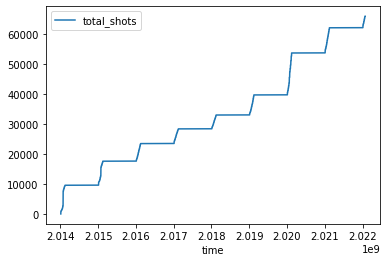

In [76]:
shot_table.plot(kind = 'scatter', x = 'time', y = 'total_shots')

shot_table.plot(kind = 'hexbin', x = 'time', y = 'total_shots')

shot_table.plot(x = 'time', y = 'total_shots')

 
0.007148 x - 1.439e+07


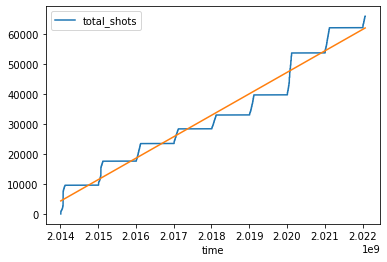

In [77]:
cof = np.polyfit(x = shot_table['time'], y = shot_table['total_shots'], deg = 1)
pfun = np.poly1d(cof)
print(pfun)
shot_table.plot(x = 'time', y = 'total_shots')
plt.plot(shot_table['time'], pfun(shot_table['time']))

Create a 3D of 

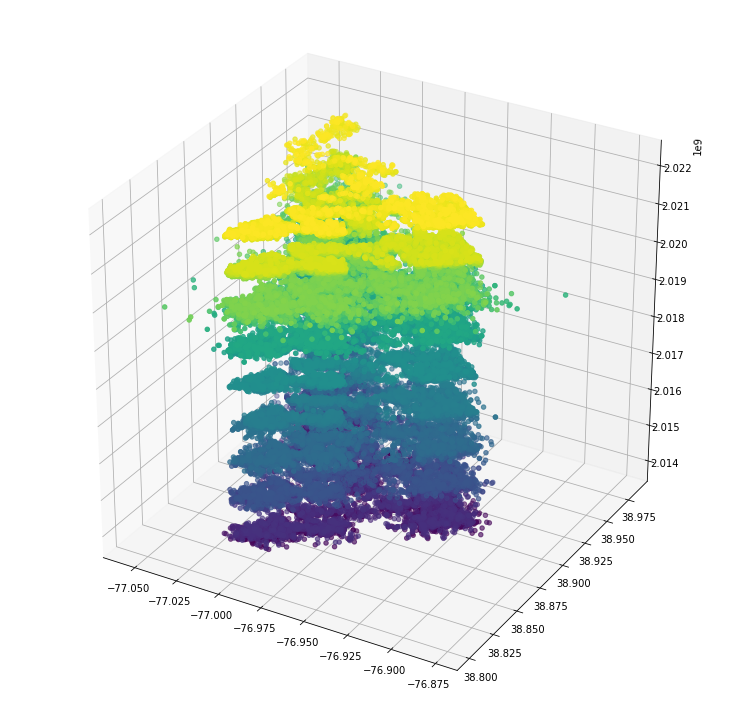

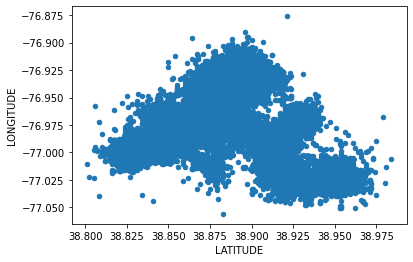

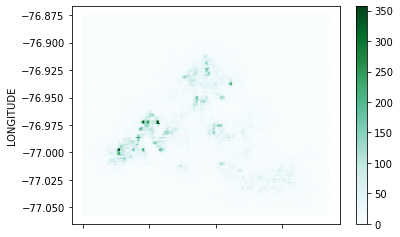

In [78]:
fig = plt.figure(figsize=(13, 13))
ax = plt.axes(projection='3d')
ax.scatter3D(shot_table['LONGITUDE'], shot_table['LATITUDE'],
             shot_table['time'], c=shot_table['total_shots'])
plt.show()
shot_table.plot(kind = 'scatter', x = 'LATITUDE', y = 'LONGITUDE')
shot_table.plot(kind = 'hexbin', x = 'LATITUDE', y = 'LONGITUDE')

In [79]:
map_osm = folium.Map(location=[38.9, -77.05], zoom_start=11.5)
map_osm

In [80]:
shot_table['SOURCE'].unique()

array(['WashingtonDC7D', 'WashingtonDC1D', 'WashingtonDC4D',
       'WashingtonDC6D', 'WashingtonDC5D', 'WashingtonDC3D'], dtype=object)

In [81]:
for index, shot in shot_table[(shot_table['year'] > 2021)].iterrows():
  if shot["TYPE"] == "Multiple_Gunshots":
      if shot["SOURCE"] == "WashingtonDC1D":
          folium.Marker(location=[shot["LATITUDE"], shot["LONGITUDE"]],
                      icon=folium.Icon(color='blue', name="apps-outline")).add_to(map_osm)
      if shot["SOURCE"] == "WashingtonDC2D":
          folium.Marker(location=[shot["LATITUDE"], shot["LONGITUDE"]],
                      icon=folium.Icon(color='red', name="apps-outline")).add_to(map_osm)
      if shot["SOURCE"] == "WashingtonDC3D":
          folium.Marker(location=[shot["LATITUDE"], shot["LONGITUDE"]],
                      icon=folium.Icon(color='black', name="apps-outline")).add_to(map_osm)
      if shot["SOURCE"] == "WashingtonDC4D":
          folium.Marker(location=[shot["LATITUDE"], shot["LONGITUDE"]],
                      icon=folium.Icon(color='gray', name="apps-outline")).add_to(map_osm)
      if shot["SOURCE"] == "WashingtonDC5D":
          folium.Marker(location=[shot["LATITUDE"], shot["LONGITUDE"]],
                      icon=folium.Icon(color='orange', name="apps-outline")).add_to(map_osm)
      if shot["SOURCE"] == "WashingtonDC6D":
          folium.Marker(location=[shot["LATITUDE"], shot["LONGITUDE"]],
                      icon=folium.Icon(color='pink', name="apps-outline")).add_to(map_osm)
      if shot["SOURCE"] == "WashingtonDC7D":
          folium.Marker(location=[shot["LATITUDE"], shot["LONGITUDE"]],
                      icon=folium.Icon(color='green', name="apps-outline")).add_to(map_osm)
  else:
      if shot["SOURCE"] == "WashingtonDC1D":
          folium.Marker(location=[shot["LATITUDE"], shot["LONGITUDE"]],
                      icon=folium.Icon(color='blue')).add_to(map_osm)
      if shot["SOURCE"] == "WashingtonDC2D":
          folium.Marker(location=[shot["LATITUDE"], shot["LONGITUDE"]],
                      icon=folium.Icon(color='red')).add_to(map_osm)
      if shot["SOURCE"] == "WashingtonDC3D":
          folium.Marker(location=[shot["LATITUDE"], shot["LONGITUDE"]],
                      icon=folium.Icon(color='black')).add_to(map_osm)
      if shot["SOURCE"] == "WashingtonDC4D":
          folium.Marker(location=[shot["LATITUDE"], shot["LONGITUDE"]],
                      icon=folium.Icon(color='gray')).add_to(map_osm)
      if shot["SOURCE"] == "WashingtonDC5D":
          folium.Marker(location=[shot["LATITUDE"], shot["LONGITUDE"]],
                      icon=folium.Icon(color='orange')).add_to(map_osm)
      if shot["SOURCE"] == "WashingtonDC6D":
          folium.Marker(location=[shot["LATITUDE"], shot["LONGITUDE"]],
                      icon=folium.Icon(color='pink')).add_to(map_osm)
      if shot["SOURCE"] == "WashingtonDC7D":
          folium.Marker(location=[shot["LATITUDE"], shot["LONGITUDE"]],
                      icon=folium.Icon(color='green')).add_to(map_osm)
map_osm

In [82]:
#trying to draw areas on the map
h3.geo_to_h3(38.9, -77.05, 3)

'832aa8fffffffff'